### Práctica 08: Análisis Estadístico Avanzado de Datos usando las librerias: Scipy, itertools y wordcloud

#### Creado por: Mariano Islas M-220192

#### Asignatura: Extracción de Conocimiento en Base de Datos

### Step 1: Libraries & Configurations

In [27]:
# Carga de paquetes y Librerías a utilizar

# Básicos (Standard)

import numpy as np # Sirve para poder realizar procesamientos básicos númericos en datos cuantitativos
import pandas as pd # Sirve para realizar los procesos ETL es un conjunto de datos
import time # Sirve para la manipulación de datos en diferentes formatos de tiempo

#Gratificadores (Plats)
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [28]:
!cd 
!dir

C:\Users\ti_la\Downloads\Practica 08
 El volumen de la unidad C es OS
 El número de serie del volumen es: 00B9-62DE

 Directorio de C:\Users\ti_la\Downloads\Practica 08

26/06/2025  02:21 p. m.    <DIR>          .
26/06/2025  01:49 p. m.    <DIR>          ..
26/06/2025  01:49 p. m.    <DIR>          .ipynb_checkpoints
26/06/2025  02:21 p. m.             7,966 Practica 08.ipynb
               1 archivos          7,966 bytes
               3 dirs  29,404,049,408 bytes libres


In [29]:
!dir

 El volumen de la unidad C es OS
 El número de serie del volumen es: 00B9-62DE

 Directorio de C:\Users\ti_la\Downloads\Practica 08

26/06/2025  02:21 p. m.    <DIR>          .
26/06/2025  01:49 p. m.    <DIR>          ..
26/06/2025  01:49 p. m.    <DIR>          .ipynb_checkpoints
26/06/2025  02:21 p. m.             7,966 Practica 08.ipynb
               1 archivos          7,966 bytes
               3 dirs  29,404,049,408 bytes libres


In [31]:
df = pd.read_csv('salaries.csv')

In [4]:
%%time

# Instalación/importación de librerías necesarias:-
from gc import collect  # recolección de basura para liberar memoria
from warnings import filterwarnings  # manejo de mensajes de advertencia

import re  # expresiones regulares

import numpy as np  # álgebra lineal
import pandas as pd  # procesamiento de datos, lectura/escritura de archivos CSV (por ejemplo, pd.read_csv)
from scipy import stats  # funciones estadísticas

from itertools import cycle, combinations  # generar combinaciones y ciclos

import matplotlib.pyplot as plt  # visualización de datos
from matplotlib.ticker import FuncFormatter  # para formatear los ejes (ticks) de manera personalizada
from matplotlib.ticker import FormatStrFormatter  # para formatear los ejes con una cadena de formato
from mpl_toolkits.mplot3d import Axes3D  # módulo para gráficos en 3D
from matplotlib.colors import ListedColormap  # colormap personalizado para gráficos de dispersión
import seaborn as sns  # visualización de datos estadísticos
from wordcloud import WordCloud  # visualización de texto en forma de nube de palabras

from io import StringIO  # manipulación de texto en formato de archivo

filterwarnings('ignore')  # ignorar mensajes de advertencia
from IPython.display import display, HTML, display_html, clear_output  # mostrar contenido HTML en notebooks

clear_output()  # limpiar la salida del notebook
print()
collect()  # ejecutar recolección de basura para liberar memoria



CPU times: total: 62.5 ms
Wall time: 65.8 ms


0

In [10]:
# Establezca el estilo de trazado en 'cinco treinta y ocho''
plt.style.use("fivethirtyeight")
sns.set(rc={"figure.figsize":(10, 10)})
print(f"Succesfully Configured libraries!")

Succesfully Configured libraries!


### Step 2: Load Dataset

In [13]:
%%time

# Manejo de errores al cargar un conjunto de datos con Pandas read_csv

try:
    # Intentar leer el conjunto de datos
    df = pd.read_csv('global_ai_ml_data_salaries.csv')
    print(f"Dataset loaded successfully.")
    
except FileNotFoundError:
    # Manejar FileNotFoundError si el archivo no existe
    print(f"Error: File not found. Please check the file path.")

except Exception as e:
    # Manejar otras excepciones
    print(f"An error occurred while loading the dataset: {e}")

print()
collect();

Error: File not found. Please check the file path.

CPU times: total: 78.1 ms
Wall time: 95.1 ms


### Step 3: Attribute Overview

In [22]:
def display_dataframe_with_custom_header(df, show_head=False):
    print(f"{'DataFrame Info:':-^50}")
    print(df.info())
    print()
    
    print(f"{'DataFrame Shape:':-^50}")
    print(df.shape)
    print()
    
    print(f"{'DataFrame Columns:':-^50}")
    print(df.columns.tolist())
    print()
    
    if show_head:
        print(f"{'DataFrame Head:':-^50}")
        display(df.head())

In [32]:
display_dataframe_with_custom_header(df)  # Display info
display_dataframe_with_custom_header(df, show_head=True)  # Display head

-----------------DataFrame Info:------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73157 entries, 0 to 73156
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   work_year           73157 non-null  int64  
 1   experience_level    73155 non-null  object 
 2   employment_type     73154 non-null  object 
 3   job_title           73155 non-null  object 
 4   salary              73148 non-null  float64
 5   salary_currency     73155 non-null  object 
 6   salary_in_usd       73150 non-null  float64
 7   employee_residence  73156 non-null  object 
 8   remote_ratio        73152 non-null  float64
 9   company_location    73155 non-null  object 
 10  company_size        73156 non-null  object 
dtypes: float64(3), int64(1), object(7)
memory usage: 6.1+ MB
None

-----------------DataFrame Shape:-----------------
(73157, 11)

----------------DataFrame Columns:----------------
['work_year', 'exper

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,SE,FT,Data Product Owner,170000.0,USD,170000.0,US,0.0,US,M
1,2025,SE,FT,Data Product Owner,110000.0,USD,110000.0,US,0.0,US,M
2,2025,SE,FT,Data Product Owner,170000.0,USD,170000.0,US,0.0,US,M
3,2025,SE,FT,Data Product Owner,110000.0,USD,110000.0,US,0.0,US,M
4,2025,SE,FT,Engineer,143000.0,USD,143000.0,US,0.0,US,M


### Step 4: Missing Value Handling

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_missing_values_heatmap(df):
    sns.set(style="whitegrid")  # Estilo limpio
    null_counts = df.isnull().sum()
    null_percentage = null_counts / len(df)

    plt.figure(figsize=(14, 7))
    
    barplot = sns.barplot(
        x=null_counts.index,
        y=null_counts.values,
        palette="YlOrBr"
    )
    
    # Título
    plt.title("Conteo de Valores Faltantes", fontsize=18, color="darkred", weight="bold", pad=20)

    # Etiquetas sobre las barras
    for i, v in enumerate(null_counts.values):
        barplot.text(i, v + 0.3, str(v), color='black', ha='center', va='bottom', fontsize=12, fontweight='bold')

    # Rotación y estilo de etiquetas del eje X
    plt.xticks(rotation=45, ha='right', fontsize=11)
    plt.yticks(fontsize=11)
    
    # Bordes sin cuadrícula
    sns.despine()

    # Etiquetas de ejes
    plt.ylabel("Cantidad de valores nulos", fontsize=13)
    plt.xlabel("Columnas", fontsize=13)

    # Mostrar gráfico
    plt.tight_layout()
    plt.show()


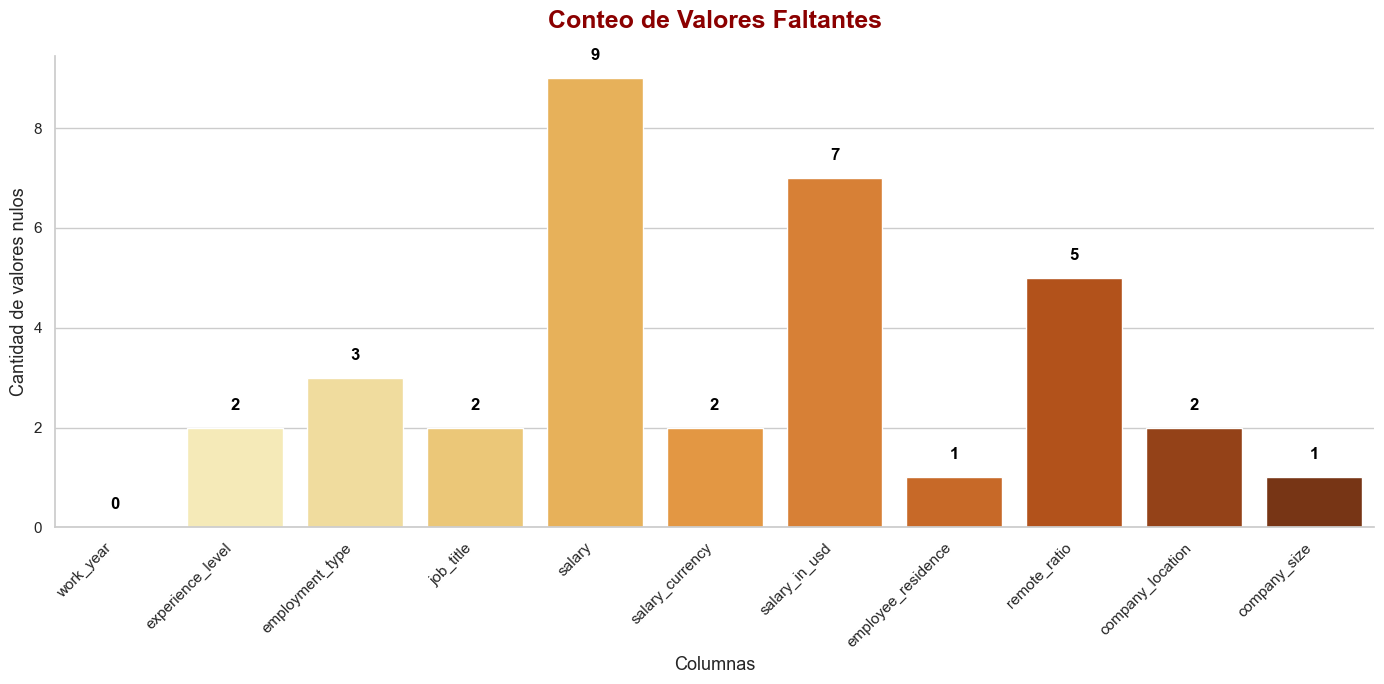

In [37]:
# Call the function to plot the heatmap
plot_missing_values_heatmap(df)

#### Step 5: Duplicate Value Manage

In [38]:
# Checking the duplicate values in the data
duplicate_values = df.duplicated().sum()
print(f'The data contains {duplicate_values} duplicate values')

# Remove duplicate rows
df_no_duplicates = df.drop_duplicates()

The data contains 39124 duplicate values


In [44]:
def apply_duplicated_styling(df):
    duplicated_cols = df.T.duplicated()
    return pd.DataFrame(duplicated_cols, index=df.columns).style.applymap(
        lambda v: 'color: blue; font-weight: bold' if v else 'color: red'
    )

In [45]:
# checks for duplicates among the columns of the DataFrame.
styled_df = apply_duplicated_styling(df)
styled_df

,0
work_year,False
experience_level,False
employment_type,False
job_title,False
salary,False
salary_currency,False
salary_in_usd,False
employee_residence,False
remote_ratio,False
company_location,False


#### Step 6 | Statistical Data Summary

### Calcular las medidas de tendencia central de nuestro dataframe

In [47]:
import pandas as pd
import numpy as np
from scipy.stats import iqr, skew, kurtosis

def calcular_estadisticas(df, opacity=1.0, font_size='14px'):
    columnas_numericas = df.select_dtypes(include=np.number).columns
    stats = {}

    for col in columnas_numericas:
        serie = df[col].dropna()
        stats[col] = [
            round(serie.mean(), 2),                     # Mean
            round(serie.median(), 2),                   # Median
            round(serie.mode().iloc[0], 2),             # Mode
            round(serie.max() - serie.min(), 2),        # Range
            round(serie.std(), 2),                      # Stdev
            round(serie.var(), 2),                      # Variance
            round(iqr(serie), 2),                       # IQR
            round(serie.quantile(0.25), 2),             # 25%
            round(serie.quantile(0.50), 2),             # 50%
            round(serie.quantile(0.75), 2),             # 75%
            round(serie.min(), 2),                      # Min
            round(serie.max(), 2),                      # Max
            round(skew(serie), 2),                      # Skewness
            round(kurtosis(serie), 2)                   # Kurtosis
        ]

    # Crear DataFrame con métricas como filas y columnas como encabezado
    orden_metricas = [
        'Mean', 'Median', 'Mode', 'Range', 'Stdev', 'Variance', 'IQR',
        '25%', '50%', '75%', 'Min', 'Max', 'Skewness', 'Kurtosis'
    ]

    stats_df = pd.DataFrame(stats, index=orden_metricas)

    return stats_df.style.set_table_attributes(f'style="opacity:{opacity}; font-size:{font_size};"')

In [48]:
stats_df = calcular_estadisticas(df)
stats_df

,work_year,salary,salary_in_usd,remote_ratio
Mean,2023.830000,162551.020000,158199.030000,21.580000
Median,2024.000000,148000.000000,147500.000000,0.000000
Mode,2024.000000,160000.000000,160000.000000,0.000000
Range,5.000000,30386000.000000,6985000.000000,100.000000
Stdev,0.480000,192576.420000,80846.650000,41.020000
Variance,0.230000,37085678574.360001,6536181581.680000,1682.900000
IQR,0.000000,93055.000000,92810.000000,0.000000
25%,2024.000000,106945.000000,106890.000000,0.000000
50%,2024.000000,148000.000000,147500.000000,0.000000
75%,2024.000000,200000.000000,199700.000000,0.000000


In [51]:
def variable_summary(df):
    summary = pd.DataFrame({
        'Variable': df.columns,
        'Dtype': df.dtypes.values,
        'Count': len(df),
        'Unique': [df[col].nunique() for col in df.columns],
        'Missing': [df[col].isnull().sum() for col in df.columns]
    })
    return summary


In [52]:
# DataFrame called 'df'
summary_df = variable_summary(df)
summary_df

,Variable,Dtype,Count,Unique,Missing
0,work_year,int64,73157,6,0
1,experience_level,object,73157,4,2
2,employment_type,object,73157,4,3
3,job_title,object,73157,289,2
4,salary,float64,73157,7095,9
5,salary_currency,object,73157,25,2
6,salary_in_usd,float64,73157,7703,7
7,employee_residence,object,73157,93,1
8,remote_ratio,float64,73157,3,5
9,company_location,object,73157,86,2
